# MPC - TP - Prediction by regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
ozone = pd.read_csv('ozone.txt', sep = ' ')
ozone
# y is the target variable, the other are predictive variables

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87
2,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82
3,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92
4,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114
...,...,...,...,...,...,...,...,...,...,...,...
96,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76
97,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71
98,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77
99,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99


In [3]:
ozone.shape

(101, 11)

## Exercise 1 : Simple linear regression to predict y

Text(0, 0.5, 'Ozone concentration')

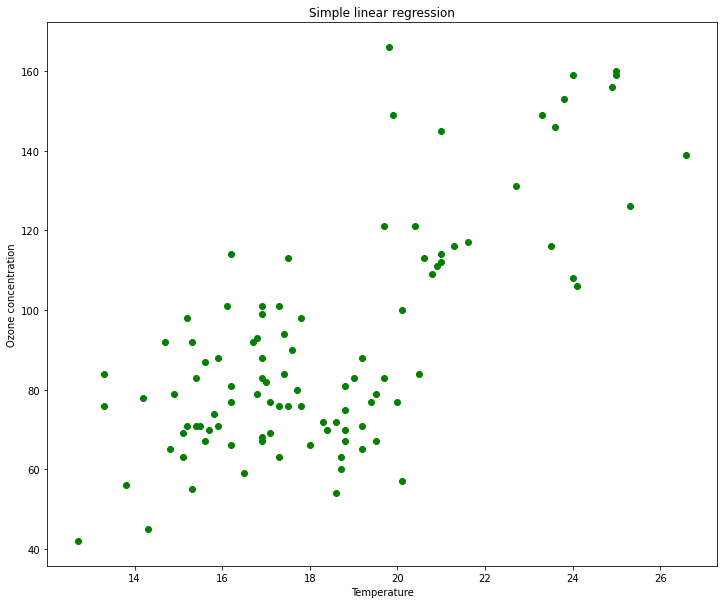

In [4]:
plt.figure(figsize=(12, 10))

#data_x1 = pd.DataFrame(ozone, columns=['x1'])
#data_y = pd.DataFrame(ozone, columns=['y'])

data_x1 = ozone['x1']
data_y = ozone['y']

plt.scatter(data_x1,data_y, marker = 'o', c = 'green' )

#plt.scatter(data_x1, marker = 'o', color = 'green', label = 'Linear regression')

plt.title("Simple linear regression") # gives a title to the figure
plt.xlabel("Temperature") # gives a label to the x-axis
plt.ylabel("Ozone concentration")# gives a label to the y-axis

In [5]:
import statsmodels.api as sm
X = ozone['x1'] # Select the column containing the predictive variable
X = sm.add_constant(X) # add a constant column for the constant term of the model (for the parameter beta_0)
print(X) # you should see 2 columns in X : a constant one (const) with ones everywhere and another with the values of x1
Y = ozone['y'] # Select the target variable and store it in Y
model = sm.OLS(Y, X).fit() # fit the model to predict Y using X
model.summary()

     const    x1
0      1.0  15.6
1      1.0  17.0
2      1.0  15.3
3      1.0  16.2
4      1.0  17.4
..     ...   ...
96     1.0  13.3
97     1.0  16.2
98     1.0  16.9
99     1.0  16.9
100    1.0  15.7

[101 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     105.5
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.78e-17
Time:                        17:38:24   Log-Likelihood:                -444.69
No. Observations:                 101   AIC:                             893.4
Df Residuals:                      99   BIC:                             898.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.0106     12.221     -2.701      0.008     -57.259      -8.762
x1             6.7460      0.657     10.273      0.000       5.443       8.049
==============================================================================
Omnibus:                        2.779   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.289
Skew:                           0.360   Prob(JB):                        0.318
Kurtosis:                       3.163   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y=-33.0106 + 6.7460*ozone['x1'][0]
y

r = (ozone['y'][0]-y)
r

14.772999999999996

In [7]:
# All the predictions made by the model on the dataset used to fit the model can be accessed by
model.fittedvalues
# Check that the fitted value for the first individual is equal to the one you computed above

0      72.226485
1      81.670840
2      70.202695
3      76.274066
4      84.369227
         ...    
96     56.710759
97     76.274066
98     80.996243
99     80.996243
100    72.901082
Length: 101, dtype: float64

In [8]:
# All the residuals made by the model on the dataset used to fit the model can be accessed by
model.resid
# Check that the residual for the first individual is equal to the one you computed above

0      14.773515
1       0.329160
2      21.797305
3      37.725934
4       9.630773
         ...    
96     27.289241
97      0.725934
98     18.003757
99      2.003757
100    -2.901082
Length: 101, dtype: float64

Text(0, 0.5, 'Ozone concentration')

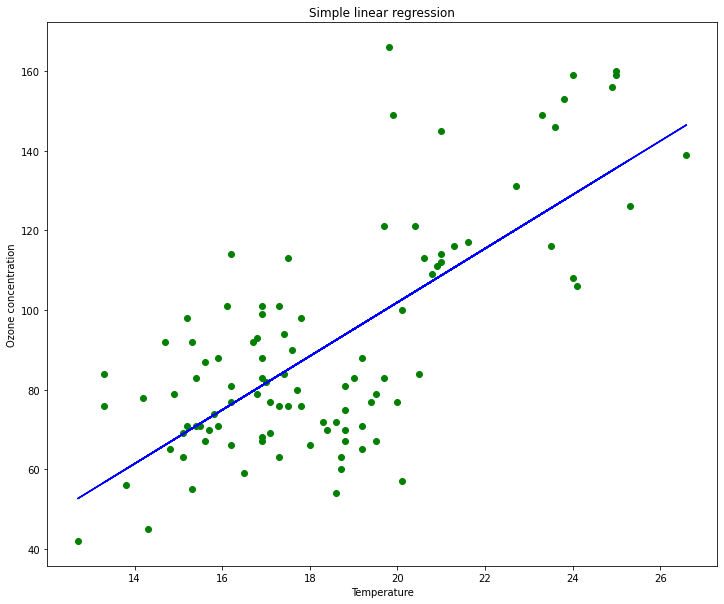

In [9]:
plt.figure(figsize=(12, 10))

#data_x1 = pd.DataFrame(ozone, columns=['x1'])
#data_y = pd.DataFrame(ozone, columns=['y'])

data_x1 = ozone['x1']
data_y = ozone['y']
data_reg = model.fittedvalues

plt.scatter(data_x1,data_y, marker = 'o', c = 'green' )
plt.plot(data_x1,data_reg, c = 'blue' )

#plt.scatter(data_x1, marker = 'o', color = 'green', label = 'Linear regression')

plt.title("Simple linear regression") # gives a title to the figure
plt.xlabel("Temperature") # gives a label to the x-axis
plt.ylabel("Ozone concentration")# gives a label to the y-axis

In [10]:
r_carre = model.rsquared
r_carre

0.5159750701422355

In [11]:
I_r = np.sum((ozone['y'] - model.fittedvalues)**2)
I_r

39455.804936241766

In [12]:
y_moy = np.mean(ozone['y'])
I_t = np.sum((ozone['y'] - y_moy)**2)
I_t

81516.05940594061

In [13]:
I_m = I_t - I_r
I_m

42060.25446969885

In [74]:
import statsmodels.api as sm
X = ozone['x4'] # Select the column containing the predictive variable
X = sm.add_constant(X) # add a constant column for the constant term of the model (for the parameter beta_0)
print(X) # you should see 2 columns in X : a constant one (const) with ones everywhere and another with the values of x1
Y = ozone['y'] # Select the target variable and store it in Y
model = sm.OLS(Y, X).fit() # fit the model to predict Y using X
model.summary()

     const  x4
0      1.0   4
1      1.0   5
2      1.0   2
3      1.0   1
4      1.0   8
..     ...  ..
96     1.0   3
97     1.0   6
98     1.0   6
99     1.0   6
100    1.0   7

[101 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     60.21
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           7.83e-12
Time:                        17:55:57   Log-Likelihood:                -457.34
No. Observations:                 101   AIC:                             918.7
Df Residuals:                      99   BIC:                             923.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        124.1098      4.840     25.640      0.000     114.505     133.714
x4            -6.6894      0.862     -7.759      0.000      -8.400      -4.979
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.441
Skew:                           0.749   Prob(JB):                      0.00891
Kurtosis:                       2.999   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
r_carre = model.rsquared
r_carre

0.37817872554611

In [76]:
I_r = np.sum((ozone['y'] - model.fittedvalues)**2)
I_r

50688.419948261

In [77]:
y_moy = np.mean(ozone['y'])
I_t = np.sum((ozone['y'] - y_moy)**2)
I_t

81516.05940594061

In [78]:
I_m = I_t - I_r
I_m

30827.639457679616

In [79]:
import statsmodels.api as sm

for x in ozone.columns[1:]:
    X = ozone[x]
    X = sm.add_constant(X) # add a constant column for the constant term of the model (for the parameter beta_0)
    Y = ozone['y'] # Select the target variable and store it in Y
    model = sm.OLS(Y, X).fit() # fit the model to predict Y using X
    print(x+' : '+str(model.rsquared))



x1 : 0.5159750701422355
x2 : 0.6128945664852581
x3 : 0.5973574009499361
x4 : 0.37817872554611
x5 : 0.39692178579182213
x6 : 0.22569404027313866
x7 : 0.2600824051363315
x8 : 0.18621446723998814
x9 : 0.1443666993650864
x10 : 0.4697289163946735


In [80]:
import statsmodels.api as sm
X = ozone['x2'] # Select the column containing the predictive variable
X = sm.add_constant(X) # add a constant column for the constant term of the model (for the parameter beta_0) x1
Y = ozone['y'] # Select the target variable and store it in Y
model = sm.OLS(Y, X).fit() # fit the model to predict Y using X
I_r = np.sum((ozone['y'] - model.fittedvalues)**2)
I_r


31555.309514750104

In [81]:
# Let's load these new individuals.
ozone_new = pd.read_csv('ozone_n.txt', sep = ' ')
ozone_new

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,106,18.3,21.9,22.9,5,6,8,1.2856,-2.2981,-3.9392,101
1,60,13.7,14.0,15.8,4,5,4,0.0000,3.2139,0.0000,71
2,72,19.9,21.6,20.4,7,7,8,-3.0000,-4.5963,-5.1962,65
3,72,18.1,21.2,23.9,7,6,4,-2.5981,-3.9392,-3.7588,113
4,97,20.8,23.7,25.0,2,3,4,0.0000,1.7101,-2.7362,93
5,59,18.3,18.3,19.0,7,7,7,-3.9392,-1.9284,-1.7101,66
6,70,17.1,18.2,18.0,7,7,7,-4.3301,-7.8785,-5.1962,72
7,81,19.6,25.1,27.2,3,4,4,-1.9284,-2.5712,-4.3301,57
8,146,27.0,32.7,33.7,0,0,0,2.9544,6.5778,4.3301,121
9,78,17.7,20.2,21.5,5,5,3,0.0000,0.5209,0.0000,59


In [82]:
# I show you here how to predict the values of new data using a model
# First, we will fit a model to predict y using x1 with the ozone data as before (we don't use the new individuals to fit the model)
X = ozone.iloc[:,1] 
X = sm.add_constant(X) 
Y = ozone['y']
model = sm.OLS(Y, X).fit() 
# Then, we will prepare the new data so that it is under the same form as the data used to create the model,
# i.e. one constant column and one column with x1 values for the new data
X_new = ozone_new.iloc[:,1] # only the x1 column of the new dataset
X_new = sm.add_constant(X_new) # add the constant column
# and then we can easily predict y for this new dataset:
model.predict(X_new)
# You can see the predictions for the 10 individuals of ozone_new

0     90.440598
1     59.409146
2    101.234147
3     89.091404
4    107.305518
5     90.440598
6     82.345437
7     99.210356
8    149.130518
9     86.393017
dtype: float64

In [83]:
mean_error = np.mean((ozone_new['y'] - model.predict(X_new))**2)
mean_error

304.81801932071556

In [88]:
# I show you here how to predict the values of new data using a model
# First, we will fit a model to predict y using x1 with the ozone data as before (we don't use the new individuals to fit the model)
X = ozone['x2'] 
X = sm.add_constant(X) 
Y = ozone['y']
model = sm.OLS(Y, X).fit() 
# Then, we will prepare the new data so that it is under the same form as the data used to create the model,
# i.e. one constant column and one column with x1 values for the new data
X_new = ozone_new.iloc[:,2] # only the x1 column of the new dataset
X_new = sm.add_constant(X_new) # add the constant column
# and then we can easily predict y for this new dataset:
model.predict(X_new)
# You can see the predictions for the 10 individuals of ozone_new

0     92.928088
1     48.599551
2     91.244726
3     89.000243
4    103.028261
5     72.727742
6     72.166622
7    110.883951
8    153.529126
9     83.389036
dtype: float64

In [89]:
mean_error = np.mean((ozone_new['y'] - model.predict(X_new))**2)
mean_error

216.84779280541434

## Exercise 2: Multiple regression to predict y

In [90]:
X = ozone.iloc[:,[1,2]] # select columns of index 1 and 2 (i.e. x1 and x2)
X = sm.add_constant(X)
Y = ozone['y']
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     78.41
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           4.62e-21
Time:                        18:00:23   Log-Likelihood:                -433.07
No. Observations:                 101   AIC:                             872.1
Df Residuals:                      98   BIC:                             880.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8288     10.950     -3.089      0.003     -55.558     -12.100
x1             1.0269      1.279      0.803      0.424      -1.512       3.566
x2             4.9153      0.976      5.034      0.000       2.978       6.853
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.806
Skew:                           0.163   Prob(JB):                        0.668
Kurtosis:                       2.708   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
model.rsquared

0.6154227247464323

In [93]:
I_r = np.sum((ozone['y'] - model.fittedvalues)**2)
I_r

31349.224015744603

In [94]:
# Then, we will prepare the new data so that it is under the same form as the data used to create the model,
# i.e. one constant column and one column with x1 values for the new data
X_new = ozone_new.iloc[:,[1,2]] # only the x1 column of the new dataset
X_new = sm.add_constant(X_new) # add the constant column
X_new
# and then we can easily predict y for this new dataset:
model.predict(X_new)
# You can see the predictions for the 10 individuals of ozone_new

0     92.607713
1     49.053373
2     92.776136
3     88.961642
4    104.022411
5     74.912713
6     73.188930
7    109.671545
8    154.626563
9     83.635613
dtype: float64

In [95]:
mean_error = np.mean((ozone_new['y'] - model.predict(X_new))**2)
mean_error

225.94603156757847

## Exercise 3 : Estimation of the generalization error by train / test split.

In [29]:
def my_regression(data, idx_p, idx_t):
    X = data.iloc[:,idx_p] 
    X = sm.add_constant(X) 
    Y = data.iloc[:,idx_t]
    mod = sm.OLS(Y, X).fit()
    return(mod)

In [30]:
model = my_regression(ozone, [1,2], 0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     78.41
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           4.62e-21
Time:                        17:38:24   Log-Likelihood:                -433.07
No. Observations:                 101   AIC:                             872.1
Df Residuals:                      98   BIC:                             880.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8288     10.950     -3.089      0.003     -55.558     -12.100
x1             1.0269      1.279      0.803      0.424      -1.512       3.566
x2             4.9153      0.976      5.034      0.000       2.978       6.853
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.806
Skew:                           0.163   Prob(JB):                        0.668
Kurtosis:                       2.708   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
co = model.model.exog_names
co[1:]

['x1', 'x2']

In [32]:
fetch = ozone_new[co[1:]]
fetch

,x1,x2
0,18.3,21.9
1,13.7,14.0
2,19.9,21.6
3,18.1,21.2
4,20.8,23.7
5,18.3,18.3
6,17.1,18.2
7,19.6,25.1
8,27.0,32.7
9,17.7,20.2


In [33]:
def my_prediction(my_model,data):
    
    columns =  my_model.model.exog_names

    X_new = data[columns[1:]] # all x column of the new dataset
    X_new = sm.add_constant(X_new) # add the constant column
    X_new
    # and then we can easily predict y for this new dataset:
    # You can see the predictions for the 10 individuals of ozone_new
    predictions = my_model.predict(X_new)
    return(predictions)

In [34]:
model =my_regression(ozone,[2,4],0)
predictions = my_prediction(model,ozone_new)
predictions

0     92.480354
1     58.705224
2     85.862897
3     84.020220
4    108.625571
5     70.660818
6     70.200149
7    112.457213
8    155.321235
9     84.648980
dtype: float64

In [35]:
ozoneAll = pd.concat([ozone,ozone_new], ignore_index=True)
ozoneAll

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87
2,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82
3,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92
4,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114
...,...,...,...,...,...,...,...,...,...,...,...
106,59,18.3,18.3,19.0,7,7,7,-3.9392,-1.9284,-1.7101,66
107,70,17.1,18.2,18.0,7,7,7,-4.3301,-7.8785,-5.1962,72
108,81,19.6,25.1,27.2,3,4,4,-1.9284,-2.5712,-4.3301,57
109,146,27.0,32.7,33.7,0,0,0,2.9544,6.5778,4.3301,121


In [36]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(ozoneAll, test_size = 0.25) 
# just need to give the input dataset (ozone here) and the fraction that you want in the test set (25% here)
# the two created datasets are called train and test as we have asked

In [37]:
train.shape

(83, 11)

In [38]:
test.shape

(28, 11)

In [39]:
train , test = train_test_split(ozoneAll, test_size = 0.25, random_state = 20) 
# now we will use these train and test sets until the end of this TP (unless specified)

In [40]:
train

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
110,78,17.7,20.2,21.5,5,5,3,0.0000,0.5209,0.0000,59
19,108,24.0,23.5,25.1,4,4,0,-2.5712,-3.8567,-4.6985,146
69,117,21.6,26.9,28.6,6,6,4,1.5321,1.9284,1.9284,113
50,156,24.9,30.5,32.2,0,1,4,-0.5000,-1.8794,-1.2856,160
65,109,20.8,23.7,26.6,8,5,4,-1.0261,-1.7101,-3.2139,116
...,...,...,...,...,...,...,...,...,...,...,...
28,113,17.5,18.2,22.7,8,8,5,-3.7588,-3.9392,-4.6985,97
95,76,13.3,17.7,17.7,7,7,6,-0.9397,-0.7660,-0.5000,92
15,81,16.2,22.4,23.4,8,3,1,0.0000,0.3473,-2.5712,145
90,42,12.7,14.3,14.9,8,7,7,-2.5000,-3.2139,-2.5000,60


In [41]:
test

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
70,131,22.7,28.4,30.1,5,3,3,0.1736,-1.9696,-1.9284,117
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87
46,153,23.8,27.7,29.4,1,1,4,0.9397,1.5000,0.0000,149
5,80,17.7,19.8,18.3,6,6,7,-5.6382,-5.0000,-6.0000,94
48,149,23.3,27.6,28.8,4,6,3,0.8660,-1.5321,-0.1736,159
31,71,19.2,21.0,22.4,6,4,6,-7.8785,-6.8937,-6.8937,77
54,77,20.0,18.2,23.6,5,7,6,-3.4641,-2.5981,-3.7588,116
2,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82
56,54,18.6,18.7,17.8,8,8,8,-4.6985,-2.5000,-0.8682,63
76,101,16.9,17.8,20.6,7,7,7,-2.0000,-0.5209,1.8794,112


In [42]:
model =my_regression(train,[10],0)
predictions = my_prediction(model,test)
predictions
np.mean((predictions-test.iloc[:,0])**2)

229.44106488635316

In [43]:
I_r = np.mean((test['y'] - predictions)**2)
I_r

229.44106488635316

In [44]:
model =my_regression(train,[1],0)
model

In [45]:
predictions = my_prediction(model,test)
predictions

70     117.754739
1       80.950972
46     124.857220
5       85.470732
48     121.628819
31      95.155934
54     100.321375
2       69.974409
56      91.281854
76      80.305291
86      73.202810
47     126.148580
67      86.116413
35      80.305291
89      70.620090
93      69.328729
79      82.888012
23      92.573214
36      83.533692
97      75.785531
12      70.620090
0       71.911450
106     89.344813
104     88.053453
44      93.864574
39      79.013931
37      68.683049
38      68.683049
dtype: float64

In [46]:
I_r = np.mean((test.iloc[:,0] - predictions)**2)
I_r

349.8933173728155

In [47]:
def generalization_error_split(train, test, idx_p, idx_t):
    #model =my_regression(train,[10],0)
    #predictions = my_prediction(model,test)
    #np.mean((predictions-test.iloc[:,0])**2)
    
    mod =my_regression(train,idx_p,idx_t)
    pred = my_prediction(mod,test)
    diff = pred-test.iloc[:,idx_t]
    I_r = np.mean(diff**2)
    
    return(I_r)

In [48]:
generalization_error_split(train, test, 2, 0)

306.78565783111577

In [50]:
for j in np.arange (1,ozoneAll.shape[1]):
    print(generalization_error_split(train, test, [j], 0))
    #print(j)


349.8933173728155
306.78565783111577
408.0046826177133
497.4068155876456
537.3194762458469
673.3548910931984
610.7579079141307
585.9510471825889
713.1390398579188
229.44106488635316


In [53]:
error2_3 =generalization_error_split(train, test, [2,3], 0)
error2_3


361.9297843156946

In [54]:
error2 = generalization_error_split(train, test, [2], 0)
error2

306.78565783111577

In [55]:
generalization_error_split(train, test, [1,2,3,4,5,6,7,8,9,10], 0)

224.18479524388653

In [56]:
generalization_error_split(train, test, [2,4,8,10], 0)

151.04317778126762